## Explorando FMA (_A Dataset For Music Analysis_)

Neste notebook, começaremos a estudar o processamento de uma quantidade maior de audios. O dataset completo contém aproximadamente 100k músicas inteiras de 161 gêneros musicais diferentes. Os dados que utilizaremos podem ser baixados através [deste link](https://os.unil.cloud.switch.ch/fma/fma_small.zip). Através dele, obtemos um subconjunto do dataset completo, que contém trechos de 30s de 8000 músicas, totalizando 8 gêneros musicais diferentes.

Aqui, focaremos na pasta **001** deste arquivo zip. A coleta e estruturação deste conjunto de dados encontra-se documentada [neste repositório](https://github.com/mdeff/fma).

In [1]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import numpy, scipy, matplotlib.pyplot as plt, sklearn, urllib, IPython.display as ipd
import librosa, librosa.display
# import utils
import os
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
folder = '/home/fccoelho/Downloads/fma_small/001'



files = os.listdir(folder)
file = files[0]
df_signals = pd.Series(name=int(file.split('.')[0]),
                       data= librosa.load(f'{folder}/{file}')[0])

for file in files[1:]:
    signal = librosa.load(f'{folder}/{file}')[0]
    title = file.split('.')[0]
    title = int(title)
    # guardando o nome do arquivo e seu sinal
    df_signals = pd.concat([df_signals,
                            pd.Series(name=int(file.split('.')[0]),
                                                 data= librosa.load(f'{folder}/{file}')[0])], axis=1)
    
# df_signals.index.names = ['track_id']

In [3]:
df_signals

,1544,1482,1102,1069,1510,1702,1735,1073,1687,1663,...,1277,1924,1683,1083,1270,1197,1259,1930,1673,1278
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.174101,NaN,-0.070405,...,NaN,NaN,0.040908,NaN,-0.228588,NaN,NaN,NaN,-0.034161,0.165032
662396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.090518,NaN,-0.169626,...,NaN,NaN,-0.115450,NaN,-0.043154,NaN,NaN,NaN,-0.001027,0.095725
662397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.118141,NaN,-0.126595,...,NaN,NaN,-0.261802,NaN,0.295003,NaN,NaN,NaN,0.033969,0.015796
662398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022657,NaN,-0.081608,...,NaN,NaN,-0.281408,NaN,0.178699,NaN,NaN,NaN,0.050603,-0.018713


Dando uma olhada na variabilidade de amplitude dentre os elementos do nosso corpus:

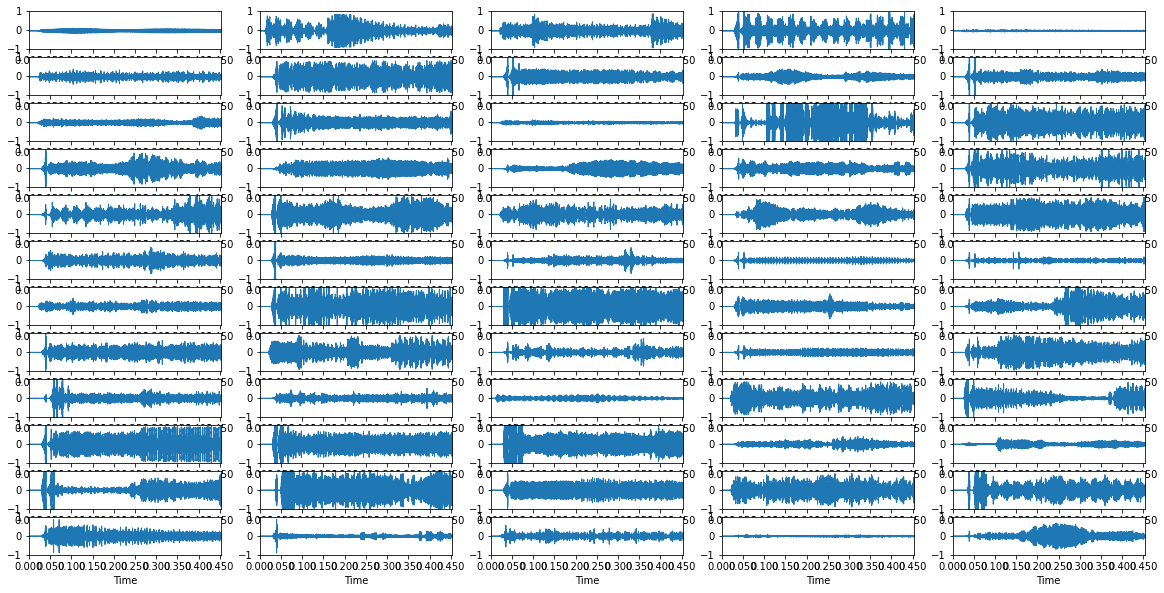

In [22]:
plt.figure(figsize=(20, 10))
for i, c in enumerate(df_signals.columns):
    x = df_signals[c].dropna().values
    plt.subplot(12, 5, i+1)
    librosa.display.waveplot(x[:10000])
    plt.ylim(-1, 1)

Agora, as FFT:

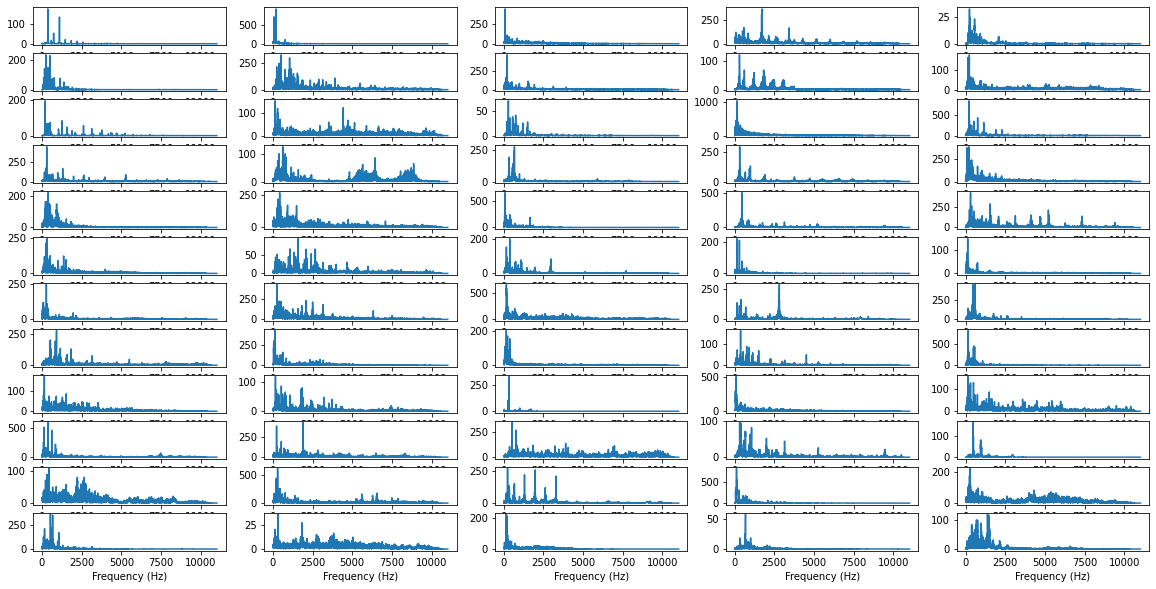

In [24]:
plt.figure(figsize=(20, 10))
for i, c in enumerate(df_signals.columns):
    x= df_signals[c].dropna().values
    plt.subplot(12, 5, i+1)
    
    # selecionamos apenas uma parte do sinal para a transformada, pois não faz sentido computar a FFT para um sinal tão grande.
    # caso contrário, as informações sobre frequência se perderiam
    X = scipy.fft.fft(x[:8192])
    X_mag = numpy.absolute(X)
    sr = 22050
    f = numpy.linspace(0, sr, 8192)
    
    # pegamos a metade do range que a transformada abrange, pois é espelhada
    plt.plot(f[:4096], X_mag[:4096])
    plt.xlabel('Frequency (Hz)')

Agora, vamos começar a olhar para o gênero de cada audio. Para fazer o download dos gêneros das músicas que estamos analisando, basta acessar [este link](https://os.unil.cloud.switch.ch/fma/fma_metadata.zip) e extrair o arquivo _tracks.csv_.

Carregando este arquivo:

In [6]:
tracks = pd.read_csv('fma_metadata/tracks.csv', index_col=0, header=[0, 1])
tracks

album                                                     \
         comments         date_created        date_released engineer   
track_id                                                               
2               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
3               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
5               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
10              0  2008-11-26 01:45:08  2008-02-06 00:00:00      NaN   
20              0  2008-11-26 01:45:05  2009-01-06 00:00:00      NaN   
...           ...                  ...                  ...      ...   
155316          0  2017-03-30 15:20:35  2017-02-17 00:00:00      NaN   
155317          0  2017-03-30 15:20:35  2017-02-17 00:00:00      NaN   
155318          0  2017-03-30 15:20:35  2017-02-17 00:00:00      NaN   
155319          0  2017-03-30 15:20:35  2017-02-17 00:00:00      NaN   
155320          0  2017-03-26 16:22:18  2017-03-26 00:00:00      NaN   

                                                                              \
         favorites     id                                        information   
track_id                                                                       
2                4      1                                            <p></p>   
3                4      1                                            <p></p>   
5                4      1                                            <p></p>   
10               4      6                                                NaN   
20               2      4          <p> "spiritual songs" from Nicky Cook</p>   
...            ...    ...                                                ...   
155316           0  22940  <p>A live performance at Monty Hall on Feb 17,...   
155317           0  22940  <p>A live performance at Monty Hall on Feb 17,...   
155318           0  22940  <p>A live performance at Monty Hall on Feb 17,...   
155319           0  22940  <p>A live performance at Monty Hall on Feb 17,...   
155320           1  22906                                                NaN   

                               \
         listens     producer   
track_id                        
2           6073          NaN   
3           6073          NaN   
5           6073          NaN   
10         47632          NaN   
20          2710          NaN   
...          ...          ...   
155316      1506  Monty Hall    
155317      1506  Monty Hall    
155318      1506  Monty Hall    
155319      1506  Monty Hall    
155320      7481          NaN   

                                                             ...       track  \
                                                       tags  ... information   
track_id                                                     ...               
2                                                        []  ...         NaN   
3                                                        []  ...         NaN   
5                                                        []  ...         NaN   
10                                                       []  ...         NaN   
20                                                       []  ...         NaN   
...                                                     ...  ...         ...   
155316                                                   []  ...         NaN   
155317                                                   []  ...         NaN   
155318                                                   []  ...         NaN   
155319                                                   []  ...         NaN   
155320    ['ballad', 'epic', 'rockabilly', 'curse', 'hex...  ...         NaN   

                                 \
         interest language_code   
track_id                          
2            4656            en   
3            1470            en   
5            1933            en   
10          54881            en   
20            978            en   
...           ... 

Concatenando as informações presentes no arquivo csv (metadados) com o sinal:

In [12]:
# df_complete = pd.concat([df_signals, tracks], axis=1, join='inner')
# df_complete.head()
tracks.columns

MultiIndex([( 'album',          'comments'),
            ( 'album',      'date_created'),
            ( 'album',     'date_released'),
            ( 'album',          'engineer'),
            ( 'album',         'favorites'),
            ( 'album',                'id'),
            ( 'album',       'information'),
            ( 'album',           'listens'),
            ( 'album',          'producer'),
            ( 'album',              'tags'),
            ( 'album',             'title'),
            ( 'album',            'tracks'),
            ( 'album',              'type'),
            ('artist', 'active_year_begin'),
            ('artist',   'active_year_end'),
            ('artist', 'associated_labels'),
            ('artist',               'bio'),
            ('artist',          'comments'),
            ('artist',      'date_created'),
            ('artist',         'favorites'),
            ('artist',                'id'),
            ('artist',          'latitude'),
          

Verificando os generos presentes em nosso dataset:

In [25]:
tracks = tracks[tracks.index.isin(df_signals.columns)]
tracks[[('track', 'genre_top')]].value_counts()

(track, genre_top)
Experimental          18
Folk                  12
Rock                  12
International         11
Pop                    6
Electronic             1
dtype: int64

### Zero crossing rate + Spectral centroid

In [17]:
def extract_zcr(signal):
    """
    Returns mean zero crossing rate from signal.
    """
    return librosa.feature.zero_crossing_rate(signal).mean()


def extract_spec_centroid(signal):
    """
    Returns spectral centroid from signal.
    """
    return librosa.feature.spectral_centroid(signal).mean()

In [48]:
# df_complete['mean_zero_crossing_rate'] = df_complete['signal'].map(extract_zcr)
# df_complete['spectral_centroid'] = df_complete['signal'].map(extract_spec_centroid)

In [62]:
for tid in df_signals.columns:
    tracks.loc[tid,'mean_zero_crossing_rate'] = extract_zcr(df_signals[tid].dropna().values)
    tracks.loc[tid,'spectral_centroid'] = extract_spec_centroid(df_signals[tid].dropna().values)

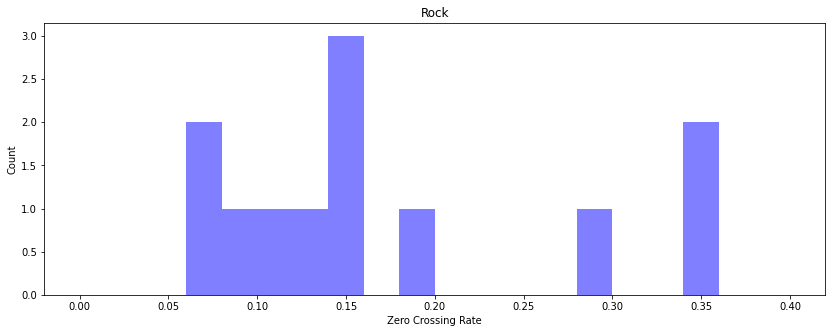

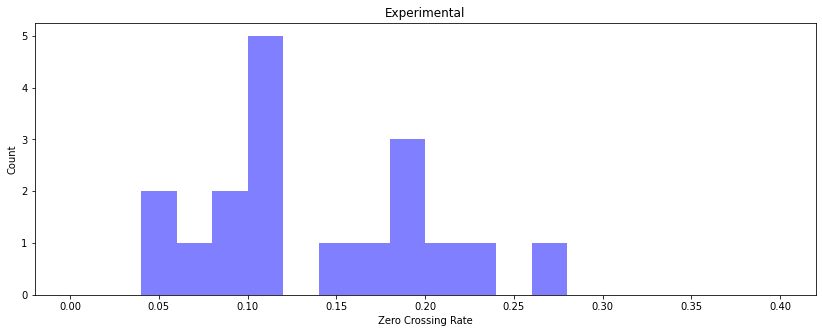

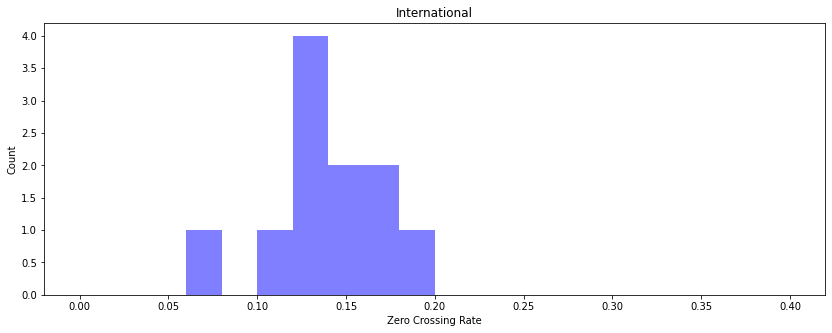

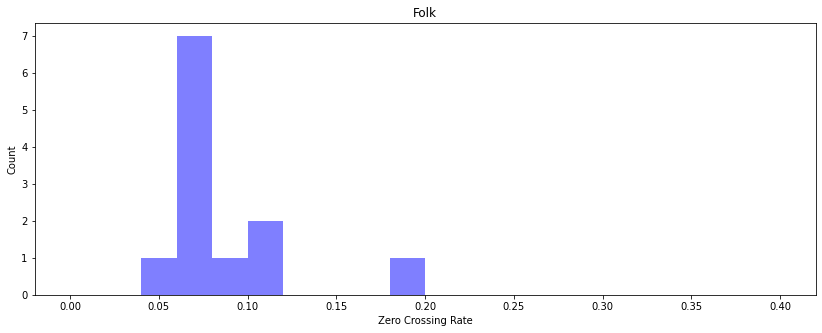

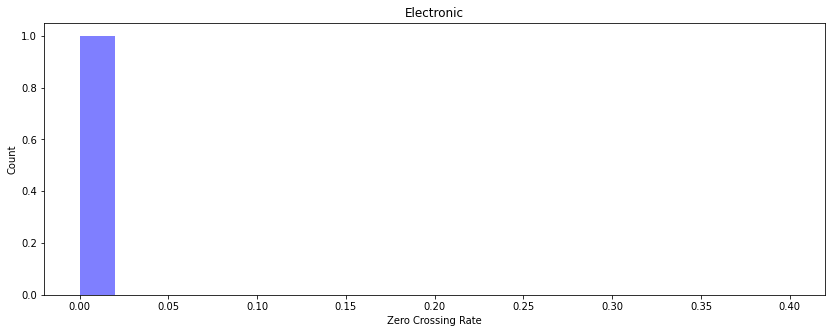

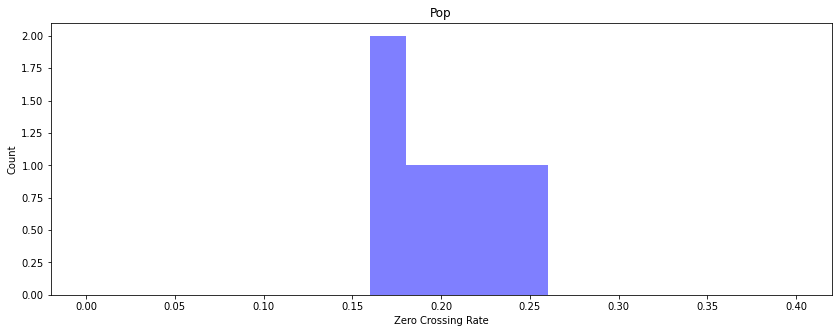

In [35]:
for genre in tracks[('track', 'genre_top')].unique():
    plt.figure(figsize=(14, 5))
    df_genre = tracks[tracks[('track', 'genre_top')] == genre]
    plt.hist(df_genre['mean_zero_crossing_rate'], color='b', range=(0, 0.4), 
             alpha=0.5, bins=20)
    plt.xlabel('Zero Crossing Rate');
    plt.title(genre)
    plt.ylabel('Count');

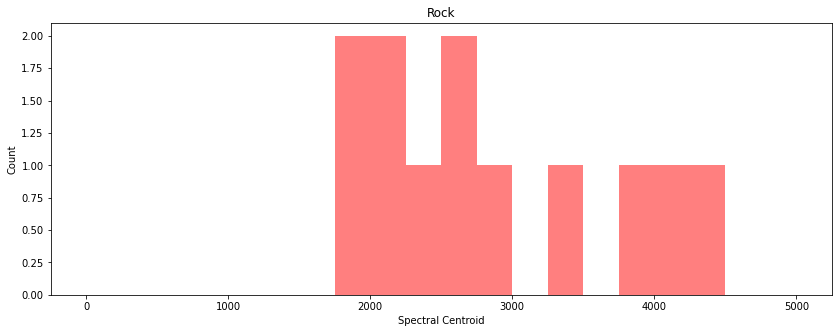

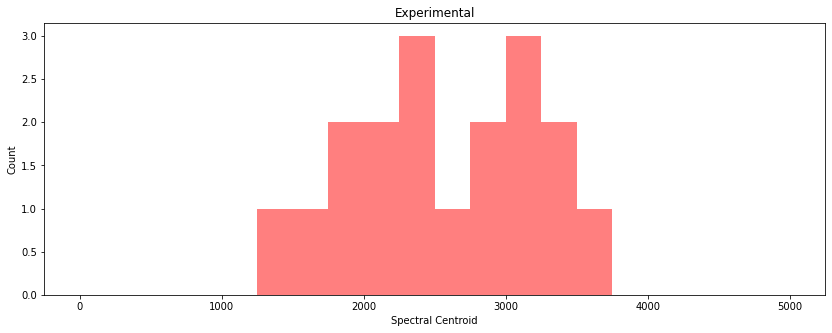

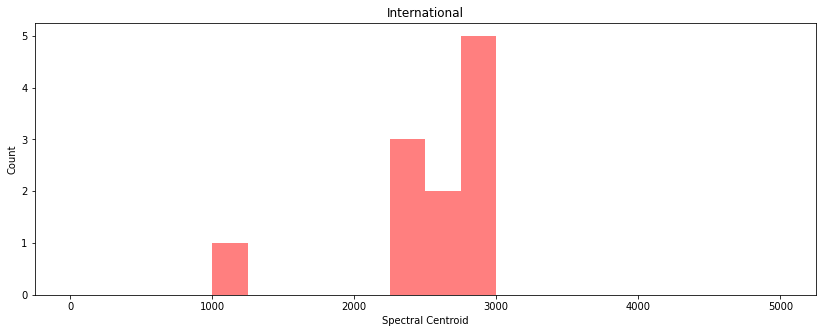

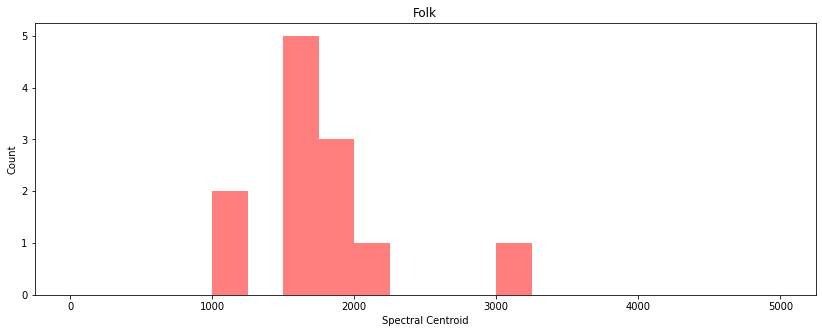

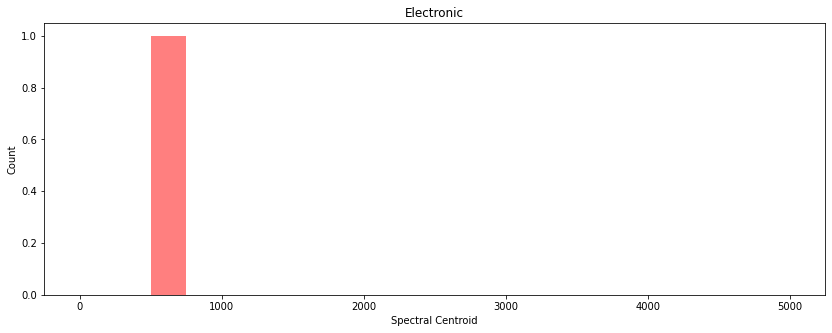

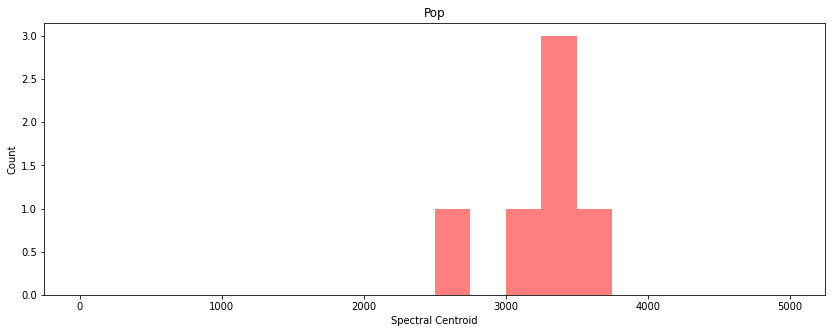

In [36]:
for genre in tracks[('track', 'genre_top')].unique():
    plt.figure(figsize=(14, 5))
    df_genre = tracks[tracks[('track', 'genre_top')] == genre]
    plt.hist(df_genre['spectral_centroid'], color='r', range=(0, 5000), 
             alpha=0.5, bins=20)
    plt.xlabel('Spectral Centroid');
    plt.title(genre)
    plt.ylabel('Count');

### Análise por gênero
Aqui, vamos olhar novamente para os waveplots dos sinais, mas separadamente por gênero.

In [37]:
tracks[('track', 'genre_top')].unique()

array(['Rock', 'Experimental', 'International', 'Folk', 'Electronic',
       'Pop'], dtype=object)

Criando uma coluna de cores para facilitar a visualização:

In [38]:
dict_genre_color = {'International':'blue', 'Experimental':'green', 'Rock':'red', 
                    'Pop':'pink', 'Folk':'orange', 'Electronic':'purple'}

tracks['color'] = tracks[('track', 'genre_top')].map(dict_genre_color)
tracks = tracks.sort_values('color')
tracks.head()

album                                                     \
         comments         date_created        date_released engineer   
track_id                                                               
1683            1  2008-11-26 03:08:00  2009-01-23 00:00:00      NaN   
1689            1  2008-11-26 03:08:00  2009-01-23 00:00:00      NaN   
1688            1  2008-11-26 03:08:00  2009-01-23 00:00:00      NaN   
1687            1  2008-11-26 03:08:00  2009-01-23 00:00:00      NaN   
1686            1  2008-11-26 03:08:00  2009-01-23 00:00:00      NaN   

                                                                            \
         favorites   id                                        information   
track_id                                                                     
1683             4  429  <p>Debut from New York's East African dance ba...   
1689             4  429  <p>Debut from New York's East African dance ba...   
1688             4  429  <p>Debut from New York's East African dance ba...   
1687             4  429  <p>Debut from New York's East African dance ba...   
1686             4  429  <p>Debut from New York's East African dance ba...   

                                ...  \
         listens producer tags  ...   
track_id                        ...   
1683        9816      NaN   []  ...   
1689        9816      NaN   []  ...   
1688        9816      NaN   []  ...   
1687        9816      NaN   []  ...   
1686        9816      NaN   []  ...   

                                                      track                   \
                                                    license listens lyricist   
track_id                                                                       
1683      Attribution-Noncommercial-Share Alike 3.0 Unit...     518      NaN   
1689      Attribution-Noncommercial-Share Alike 3.0 Unit...     500      NaN   
1688      Attribution-Noncommercial-Share Alike 3.0 Unit...     423      NaN   
1687      Attribution-Noncommercial-Share Alike 3.0 Unit...     476      NaN   
1686      Attribution-Noncommercial-Share Alike 3.0 Unit...     657      NaN   

                                                  mean_zero_crossing_rate  \
         number publisher tags              title                           
track_id                                                                    
1683          4       NaN   []     Mapenzi Matamu                0.149953   
1689         10       NaN   []              Unalo                0.172890   
1688          9       NaN   []          Sishituki                0.162183   
1687          8       NaN   []  Lala, Mpenzi Lala                0.118475   
1686          7       NaN   []             Rufiji                0.132609   

         spectral_centroid color  
                                  
track_id                          
1683           2605.488082  blue  
1689           2989.977553  blue  
1688           2814.579756  blue  
1687           2270.851108  blue  
1686           2811.158476  blue  

[5 rows x 55 columns]

Waveplots:

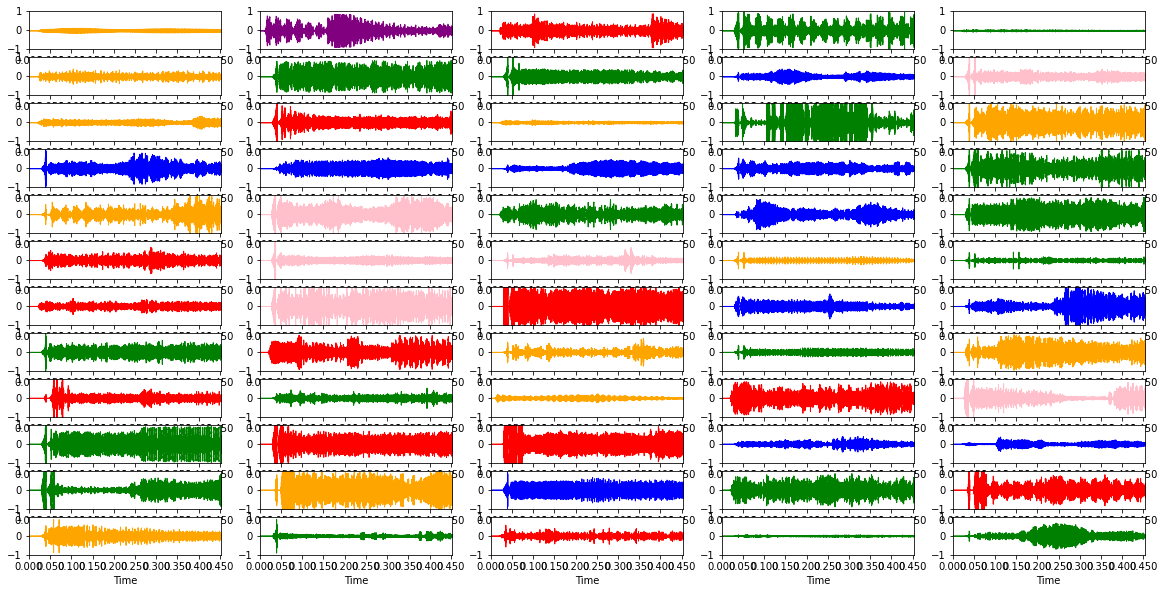

In [44]:
plt.figure(figsize=(20, 10))
for n,i in enumerate(df_signals.columns):
    plt.subplot(12, 5, n+1)
    
    color = tracks.loc[i].color
    librosa.display.waveplot(df_signals[i].values[:10000], 
                             color=color)
    plt.ylim(-1, 1)

FFT:

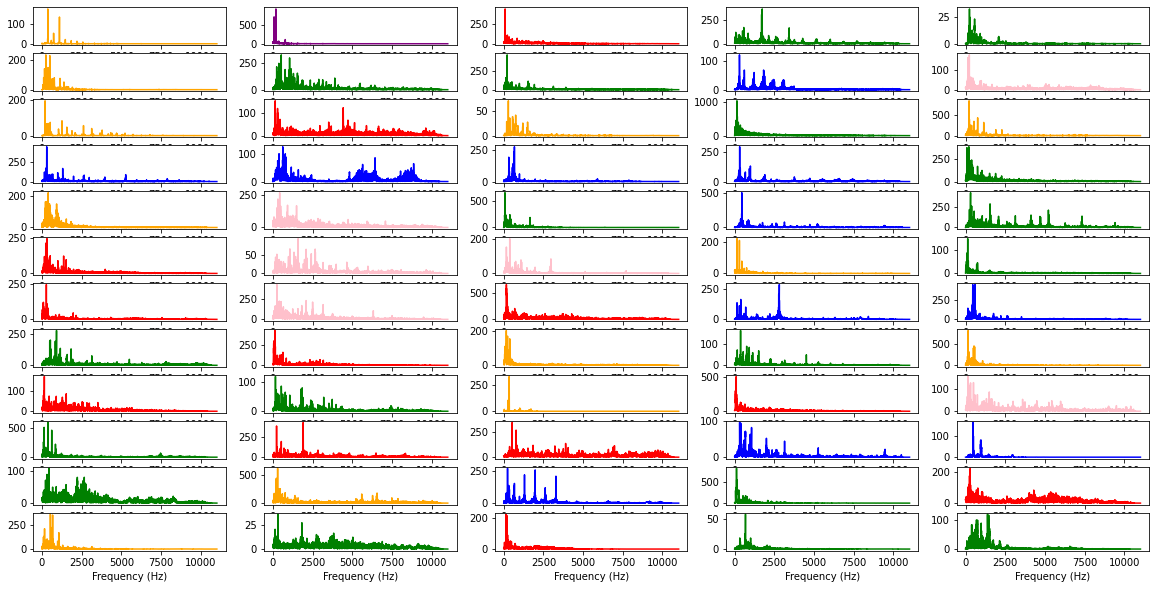

In [58]:
plt.figure(figsize=(20, 10))
for n,i,in enumerate(df_signals.columns):
    plt.subplot(12, 5, n+1)
    
    X = scipy.fft.fft(df_signals[i].values[:8192])
    X_mag = numpy.absolute(X)
    sr = 22050
    f = numpy.linspace(0, sr, 8192)
    
    # pegamos a metade do range que a transformada abrange, pois é espelhada
    color = tracks.loc[i].color
    plt.plot(f[:4096], X_mag[:4096], color=color[0])
    plt.xlabel('Frequency (Hz)')

### Energy/RMSE

In [69]:
def get_rmse(signal):
    return librosa.feature.rms(signal, center=True).mean()

def get_rmse_mean(signal):
    return librosa.feature.rms(signal, center=True).mean()

In [70]:
# df_complete['RMSE'] = df_complete['signal'].map(get_rmse)
# df_complete['RMSE_mean'] = df_complete['signal'].map(get_rmse_mean)

In [71]:
for tid in df_signals.columns:
    tracks.loc[tid,'RMSE'] = get_rmse(df_signals[tid].dropna().values)
    tracks.loc[tid,'RMSE_mean'] = get_rmse_mean(df_signals[tid].dropna().values)

Plotando um exemplo com o waveplot:

(-1, 1)

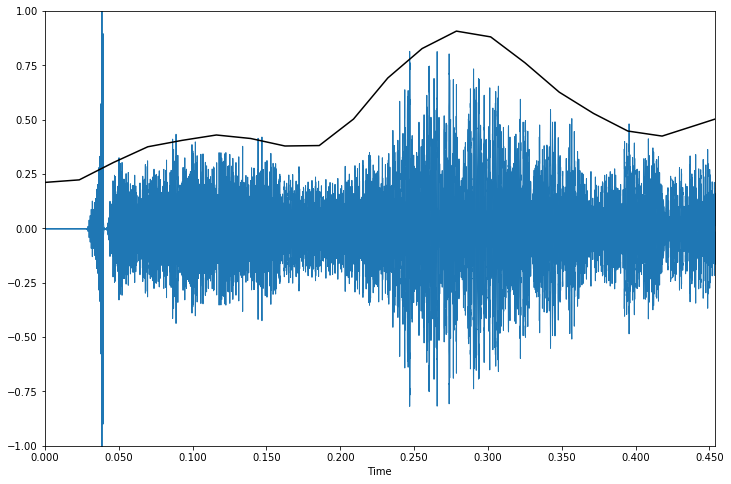

In [110]:
plt.figure(figsize=(12,8))

exemp = df_complete.iloc[8]
librosa.display.waveplot(exemp['signal'][:10000])

rmse = exemp['RMSE']
frames = range(len(rmse))
t = librosa.frames_to_time(frames)
plt.plot(t[:len(rmse)], rmse/rmse.max(), color='k')

plt.ylim(-1, 1)

Plotando tudo:

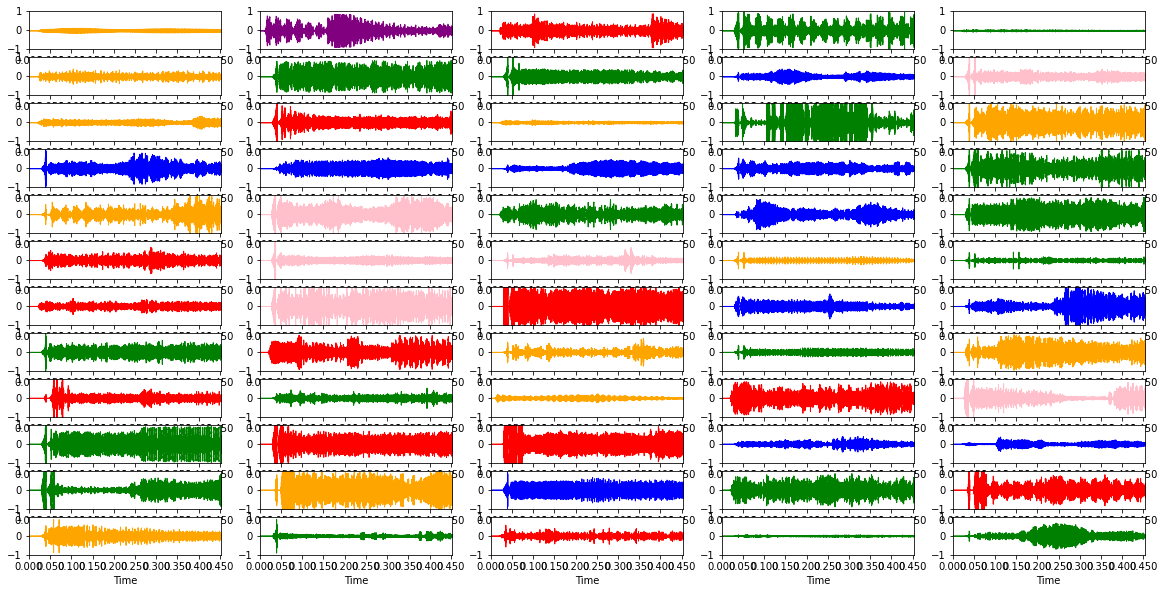

In [73]:
plt.figure(figsize=(20, 10))
for n,i in enumerate(df_signals.columns):
    plt.subplot(12, 5, n+1)
    
    color = tracks.loc[i].color
    librosa.display.waveplot(df_signals[i].values[:10000], 
                             color=color)
    
    rmse = tracks.loc[i]['RMSE']
    frames = range(len(rmse))
    t = librosa.frames_to_time(frames)
    plt.plot(t[:len(rmse)], rmse/rmse.max(), color='k')
    
    plt.ylim(-1, 1)

RMSE médio:

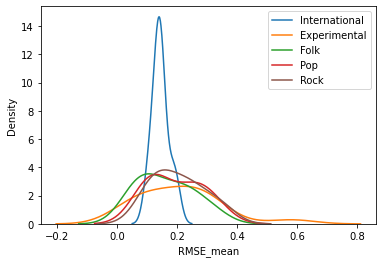

In [74]:
genres = tracks[('track', 'genre_top')].unique()

for genre in genres:
    df_genre = tracks[tracks[('track', 'genre_top')] == genre]
    sns.kdeplot(df_genre['RMSE_mean'], label=genre)
    plt.legend()

Como vemos acima, o único gênero que parece se diferenciar mais em termos de _energia média_ é o Internacional. Repare que o gênero para o qual temos apenas uma observação (_'Electronic'_) nem aparece no gráfico de densidade acima.